In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    from sklearn.datasets import fetch_openml
    boston = fetch_openml(name='boston', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
df=pd.DataFrame(boston.data)
df['median']=boston.target
df.head()
df.shape

(506, 14)

In [4]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  median   506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [6]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [7]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [8]:
# EDA
# Corelation
# check for multicolinearity. Check for relation
corelation=df.corr()
corelation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


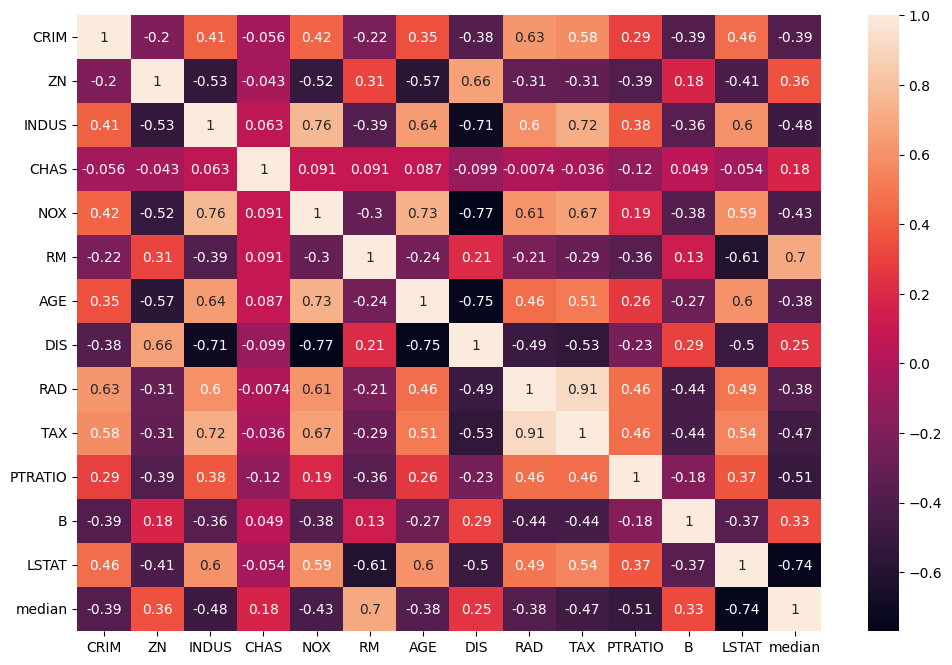

In [9]:
import seaborn as sns
# sns.pairplot(df)
plt.figure(figsize=(12, 8))
sns.heatmap(corelation, annot=True)
plt.show()

Text(0, 0.5, 'Price')

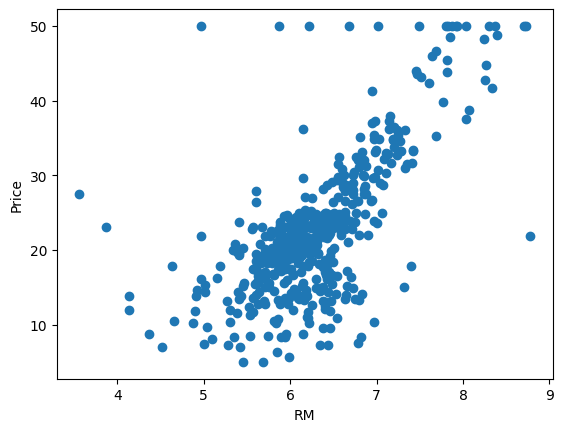

In [10]:
plt.scatter(df['RM'],df['median'])
plt.xlabel('RM')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='median'>

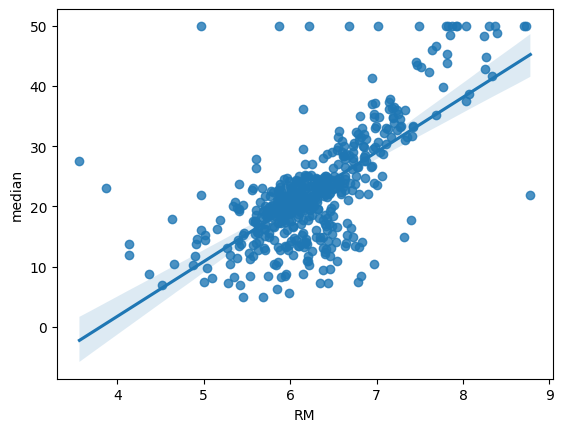

In [11]:
 sns.regplot(x="RM",y='median', data=df)

<Axes: xlabel='LSTAT', ylabel='median'>

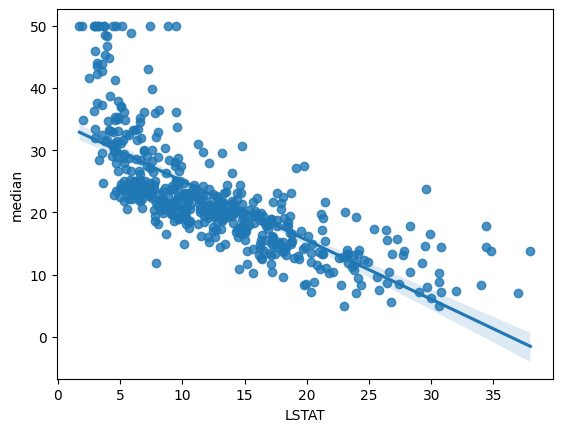

In [12]:
#  sns.regplot(x="RM",y='median', data=df)
sns.regplot(x="LSTAT",y='median', data=df)

<Axes: xlabel='PTRATIO', ylabel='median'>

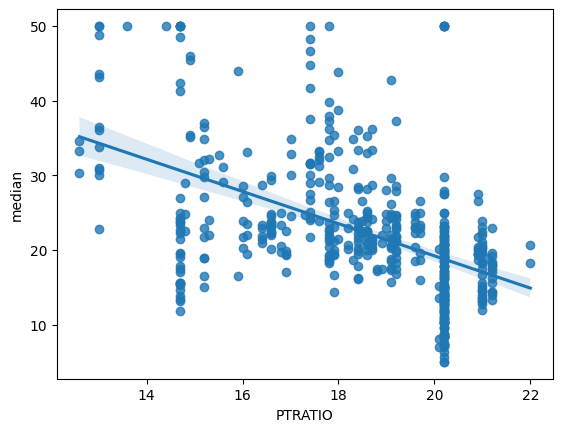

In [13]:
sns.regplot(x="PTRATIO",y='median', data=df)

In [14]:
# dividing into independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
print('X shape=', X.shape[0])
print('y shape=', y.shape[0])

X shape= 506
y shape= 506


In [16]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=17)

In [17]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (354, 13)
X_test shape (152, 13)
y_train shape (354,)
y_test shape (152,)


In [18]:
# Standard Scaling
# we use gradient descent, come near the global minima
# standardizing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)


In [19]:
# X_test=scaler.fit_transform(X_test)
# X_test_standardized=X_test.values.reshape(-1, 1)
X_test=scaler.transform(X_test)
X_test

array([[-0.4286757 ,  1.50413857, -1.17680101, ..., -1.48583198,
         0.38267779, -1.12899598],
       [-0.43525394,  1.94028147, -1.35045637, ..., -1.4401379 ,
         0.43712977, -0.64472652],
       [-0.01870959, -0.45850446,  0.9625164 , ...,  0.79887187,
         0.40137188,  0.23352488],
       ...,
       [-0.43283192, -0.45850446, -1.3606714 , ...,  0.11346072,
         0.43615159, -1.36839473],
       [ 0.57970631, -0.45850446,  0.9625164 , ...,  0.79887187,
         0.25247126,  0.63708276],
       [-0.43062485, -0.45850446, -1.02357568, ...,  0.02207256,
         0.45093297, -0.01134584]])

In [20]:
# Model training
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [21]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
arr=[1,1,0,-1,-1]
pos=[]
neg=[]
zero=[]
for i in arr:
    if arr[i] < 0:
        neg.append(i)
    elif arr[i] > 0:
        pos.append(i)
    else:
       zero.append(i)
print("{:.6f}".format(len(pos)/len(arr)))
print("{:.6f}".format(len(neg)/len(arr)))
print("{:.6f}".format(len(zero)/len(arr)))


0.600000
0.400000
0.000000


In [22]:
regression.coef_

array([-1.01789825,  1.27907897,  0.46289759,  0.90799972, -1.9528991 ,
        2.37352883, -0.00436193, -3.06898343,  2.71771507, -2.2241914 ,
       -2.06064407,  0.74767696, -4.18889223])

In [23]:
regression.intercept_

22.38785310734463

In [24]:
# on which parameters has model been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [25]:
# prediction
reg_pred=regression.predict(X_test)
reg_pred

array([30.30255143, 27.40582625, 20.13587321, 38.6717523 , 26.10955714,
       18.24538378, 36.8404789 , 22.01944652,  3.4425116 , 30.71551069,
       17.60086701, 19.83158273, 23.25787352, 16.60874384, 22.29161244,
       23.24521589, 24.25342068, 14.3151454 , 15.57737466, 19.29060481,
       32.50729818, 28.71773094, 16.2356928 , 19.5543733 , 24.74875961,
       33.7851496 , 17.59010555,  9.89378119, 17.37121249, 26.10013275,
       25.25448854, 20.23267328, 22.20065118, 21.92911395, 20.68802867,
        8.34146734, 34.76934348, 13.01747258, 20.49983122, 34.79303503,
        8.69926342, 20.38395911, 27.53824861, 20.44809494, 20.32521531,
       13.37814647, 31.4958051 , 28.8653664 , 20.51422817, 18.03298715,
       27.62270965, 21.85375684, 28.28103183, 22.99964547, 19.51234583,
       13.81248732, 17.71928601, 25.4387827 , 36.6134441 , 26.9025276 ,
       23.75112387, 22.33282273, 23.80208002, 20.47548551, 15.47754496,
       25.32076555, 28.55367217, 32.52633809, 31.94741607, 27.48

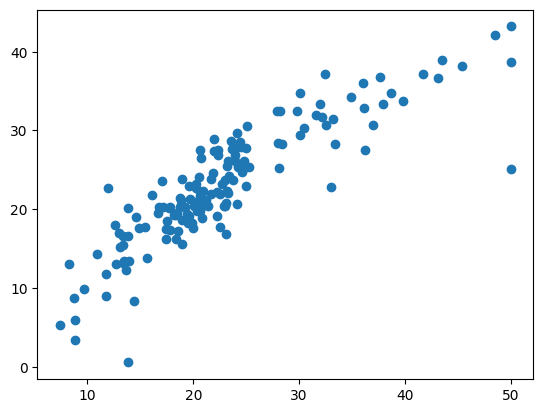

In [26]:
# poltting graphs for prediction
plt.scatter(y_test,reg_pred)

In [27]:
residuals= y_test- reg_pred
residuals

,median
191,0.197449
285,-5.405826
461,-2.435873
225,11.328248
159,-2.809557
...,...
498,-0.033262
189,0.640756
3,5.141367
356,-2.537101


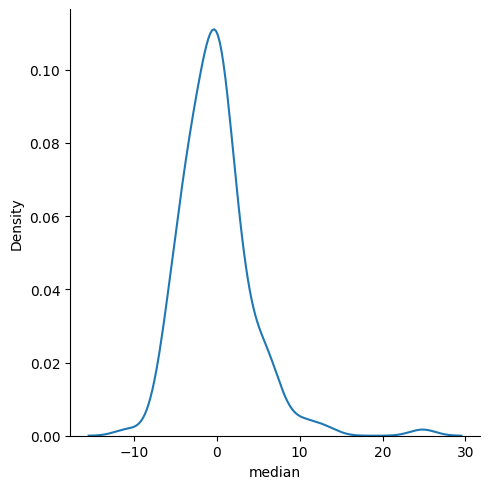

In [28]:
sns.displot(residuals,kind='kde')

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_test,reg_pred)
mae=mean_absolute_error(y_test,reg_pred)
print(mse)
print(mae)
print(np.sqrt(mse))


18.0417481083593
2.9665844369789744
4.247557899353381


In [31]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.7620882852026807

In [44]:
# new data prediction
new=boston.data.head(1)
st=scaler.transform(new)
print(new)
print(st)

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE   DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.09   1  296.0     15.3   

       B  LSTAT  
0  396.9   4.98  
[[-0.43577884  0.32655275 -1.34170064 -0.28154625 -0.17682019  0.41680661
  -0.14483865  0.18370963 -1.00284804 -0.70665629 -1.4401379   0.46082345
  -1.08932419]]


In [45]:
regression.predict(st)

array([29.86535287])

In [46]:
import pickle
pickle.dump(regression,open('reg_model.pkl','wb'))

In [47]:
pickle_model=pickle.load(open('reg_model.pkl','rb'))

In [48]:
pickle_model.predict(st)

array([29.86535287])